# Chicago Crime Analysis For The Year 2021

In [94]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno
import scipy

In [95]:
_ = sns.set_style('darkgrid')

In [96]:
chicago_df = pd.read_csv('dataset/Crimes_-_2001_to_Present.csv', )

In [97]:
chicago_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,-87.670000,"(41.815117282, -87.669999562)",29.0,14924.0,59.0,706.0,3.0,37.0,23.0,108.0
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,-87.765400,"(41.895080471, -87.765400451)",4.0,4299.0,26.0,562.0,45.0,5.0,25.0,67.0
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,-87.716650,"(41.937405765, -87.716649687)",15.0,21538.0,22.0,216.0,12.0,39.0,7.0,168.0
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,-87.755121,"(41.881903443, -87.755121152)",11.0,22216.0,26.0,696.0,23.0,32.0,25.0,81.0


In [98]:
chicago_df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
7487242,12614226,JF139791,02/08/2022 06:00:00 PM,015XX W 78TH ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,-87.662468,"(41.752190867, -87.662468031)",17.0,21554.0,70.0,557.0,31.0,59.0,20.0,230.0
7487243,12613602,JF138973,02/08/2022 09:00:00 AM,018XX N LAWNDALE AVE,0580,STALKING,SIMPLE,STREET,False,False,...,-87.719131,"(41.914403235, -87.719130719)",10.0,22535.0,23.0,388.0,41.0,1.0,6.0,193.0
7487244,12613160,JF138410,02/08/2022 11:16:00 PM,0000X N CENTRAL AVE,041A,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,...,-87.764894,"(41.881348498, -87.764894125)",52.0,22216.0,26.0,674.0,7.0,32.0,25.0,97.0
7487245,12612872,JF138270,02/08/2022 07:20:00 PM,034XX W ROOSEVELT RD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,-87.711253,"(41.86633932, -87.711253448)",36.0,21572.0,30.0,772.0,14.0,57.0,21.0,153.0
7487246,12612475,JF137708,02/08/2022 11:00:00 AM,022XX N KEDZIE BLVD,0820,THEFT,$500 AND UNDER,ALLEY,False,False,...,-87.707131,"(41.921959147, -87.707130855)",10.0,22535.0,23.0,321.0,40.0,1.0,7.0,185.0


#### Preparing the data

In [99]:
# Drop irrelevant columns
# Date fields are converted to timestampls
# Month and Hour fields are extracted from said timestamps
# Categorical features (if any) are indentified and the date type changed accordingly
# List of numerical and categorical predictors are prepared

In [100]:
chicago_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487247 entries, 0 to 7487246
Data columns (total 30 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   ID                          int64  
 1   Case Number                 object 
 2   Date                        object 
 3   Block                       object 
 4   IUCR                        object 
 5   Primary Type                object 
 6   Description                 object 
 7   Location Description        object 
 8   Arrest                      bool   
 9   Domestic                    bool   
 10  Beat                        int64  
 11  District                    float64
 12  Ward                        float64
 13  Community Area              float64
 14  FBI Code                    object 
 15  X Coordinate                float64
 16  Y Coordinate                float64
 17  Year                        int64  
 18  Updated On                  object 
 19  Latitude             

In [101]:
# Drop irrelevant columns
chicago_df.drop(['ID', 'FBI Code', 'Historical Wards 2003-2015',
                'Zip Codes','Community Areas','Census Tracts','Wards',
                'Boundaries - ZIP Codes','Police Districts','Police Beats'], axis=1, inplace=True)

In [102]:
chicago_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487247 entries, 0 to 7487246
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Case Number           object 
 1   Date                  object 
 2   Block                 object 
 3   IUCR                  object 
 4   Primary Type          object 
 5   Description           object 
 6   Location Description  object 
 7   Arrest                bool   
 8   Domestic              bool   
 9   Beat                  int64  
 10  District              float64
 11  Ward                  float64
 12  Community Area        float64
 13  X Coordinate          float64
 14  Y Coordinate          float64
 15  Year                  int64  
 16  Updated On            object 
 17  Latitude              float64
 18  Longitude             float64
 19  Location              object 
dtypes: bool(2), float64(7), int64(2), object(9)
memory usage: 1.0+ GB


In [103]:
# Check records with null entries
chicago_df[chicago_df.isnull().any(axis=1)].head()
chicago_df.shape

(7487247, 20)

In [104]:
# Drop records with null entries
original_rows = chicago_df.shape[0]
chicago_df.dropna(inplace=True)
print('Dropped {} records with null entries'.format(original_rows - chicago_df.shape[0]))

Dropped 689323 records with null entries


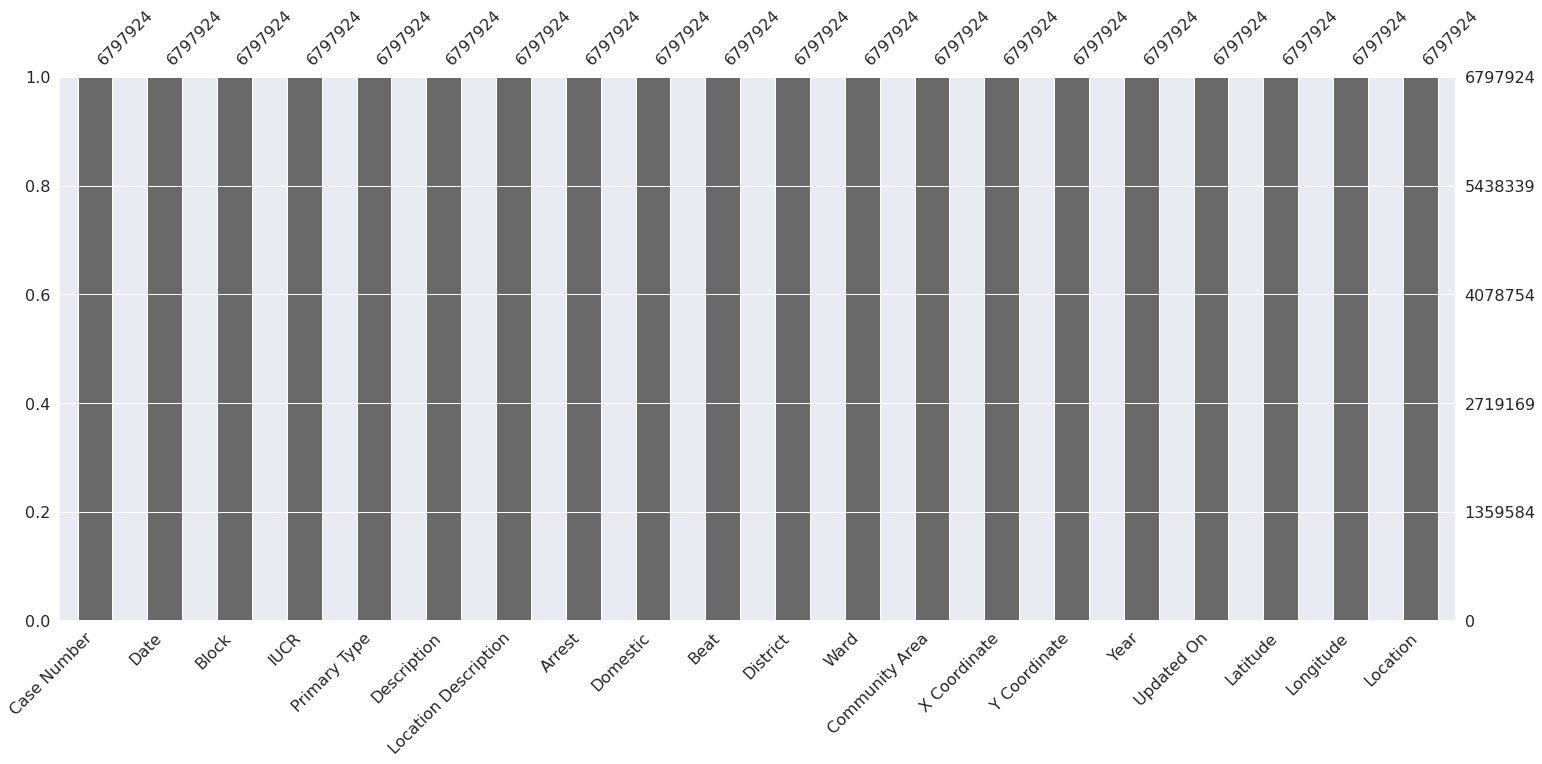

In [105]:
# #Visualising Missing Data
msno.bar(chicago_df)
plt.show()

In [106]:
# Check for duplicates
chicago_df[chicago_df.duplicated()]

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
809655,G601256,10/07/2001 01:53:00 AM,086XX S PHILLIPS AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,423,4.0,7.0,46.0,1193998.0,1848075.0,2001,03/19/2019 04:11:22 PM,41.738055,-87.564816,"(41.738055264, -87.564816173)"
1105765,HH207311,02/25/2002 01:10:00 AM,058XX S SANGAMON ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,712,7.0,16.0,68.0,1170979.0,1865929.0,2002,03/18/2019 04:08:09 PM,41.787582,-87.648631,"(41.787582014, -87.648631009)"
1206445,HH494479,07/08/2002 01:45:00 AM,080XX S STEWART AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,True,False,621,6.0,17.0,44.0,1175021.0,1851640.0,2002,03/18/2019 04:08:09 PM,41.748282,-87.634237,"(41.74828207, -87.6342366)"
1455683,HH786759,11/18/2002 12:24:00 PM,022XX E 98TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,431,4.0,7.0,51.0,1192866.0,1840052.0,2002,03/19/2019 04:11:22 PM,41.716067,-87.569224,"(41.716067058, -87.569224393)"
1478344,HR472369,08/08/2009 08:15:00 PM,100XX S EBERHART AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,True,511,5.0,9.0,49.0,1181350.0,1838420.0,2009,03/18/2019 04:08:09 PM,41.711861,-87.611451,"(41.711861362, -87.611451453)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7292802,JE168486,03/14/2021 04:55:00 AM,067XX S SOUTH CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,YARD,False,False,322,3.0,20.0,69.0,1180481.0,1860288.0,2021,03/21/2021 04:49:58 PM,41.771890,-87.613964,"(41.771889629, -87.613964461)"
7344702,JE266473,06/15/2021 07:55:00 AM,062XX S MORGAN ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,712,7.0,16.0,68.0,1170714.0,1863474.0,2021,06/22/2021 04:58:14 PM,41.780851,-87.649674,"(41.780850996, -87.649674221)"
7404982,JE379611,09/19/2021 01:40:00 PM,118XX S EMERALD AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,524,5.0,34.0,53.0,1173447.0,1826465.0,2021,09/26/2021 04:48:34 PM,41.679233,-87.640746,"(41.679233183, -87.640746288)"
7445410,JE454914,11/23/2021 08:54:00 PM,004XX E 71ST ST,0110,HOMICIDE,FIRST DEGREE MURDER,BARBER SHOP/BEAUTY SALON,True,False,323,3.0,6.0,69.0,1180287.0,1858038.0,2021,01/26/2022 03:51:49 PM,41.765720,-87.614745,"(41.765719848, -87.614744505)"


In [107]:
# Drop records with duplicate entries
chicago_df.drop_duplicates(inplace=True)

In [108]:
chicago_df[chicago_df.duplicated()]

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location


In [109]:
# List of columns with float and convert to int
float_cols = list(chicago_df.select_dtypes(include=['float64']).columns)
float_cols.remove('Latitude')
float_cols.remove('Longitude')

In [110]:
chicago_df[float_cols] = chicago_df[float_cols].astype('int64')

In [111]:
# Convert Date & Year to datetime
chicago_df['Date'] = pd.to_datetime(chicago_df['Date'], format='%m/%d/%Y %I:%M:%S %p')
chicago_df['Updated On'] = pd.to_datetime(chicago_df['Updated On'], format='%m/%d/%Y %I:%M:%S %p')

In [112]:
# Extract month and hour from timestamp
chicago_df['month'] = chicago_df['Date'].dt.month
chicago_df['hour'] = chicago_df['Date'].dt.hour

In [113]:
#Sort Data in chronological order
chicago_df = chicago_df.sort_values(['Date'], ascending=True, ignore_index=True)

In [114]:
# Tools required for analysis

In [115]:
# Get Month Name
def _month_(val):
    if val == 1:
        return 'JAN'
    elif val == 2:
        return 'FEB'
    elif val == 3:
        return 'MAR'
    elif val == 4:
        return 'APR'
    elif val == 5:
        return 'MAY'
    elif val == 6:
        return 'JUN'
    elif val == 7:
        return 'JUL'
    elif val == 8:
        return 'AUG'
    elif val == 9:
        return 'SEP'
    elif val == 10:
        return 'OCT'
    elif val == 11:
        return 'NOV'
    else:
        return 'DEC'
    
# Get Weekday
def _weekday_(val):
    if val == 0:
        return 'Monday'
    elif val == 1:
        return 'Tuesday'
    elif val == 2:
        return 'Wednesday'
    elif val == 3:
        return 'Thursday'
    elif val == 4:
        return 'Friday'
    elif val == 5:
        return 'Saturday'
    else:
        return 'Sunday'

In [116]:
chicago_df['month_name'] = chicago_df['month'].apply(_month_)
chicago_df['weekday'] = chicago_df['Date'].dt.weekday.apply(_weekday_)

In [117]:
chicago_df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,month,hour,month_name,weekday
0,HK577780,2001-01-01,072XX S WENTWORTH AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,731,...,1857164,2001,2006-03-31 22:03:38,41.763415,-87.629872,"(41.763414952, -87.629871775)",1,0,JAN,Monday
1,HN768190,2001-01-01,013XX S SAWYER AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1022,...,1893621,2001,2008-01-23 14:56:07,41.863909,-87.706963,"(41.863909291, -87.706963383)",1,0,JAN,Monday
2,HL265830,2001-01-01,113XX S HARVARD AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,522,...,1829795,2001,2006-03-31 22:03:38,41.688316,-87.631536,"(41.68831595, -87.631536251)",1,0,JAN,Monday
3,HH368190,2001-01-01,060XX W ARDMORE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1622,...,1938218,2001,2015-08-17 15:03:40,41.986663,-87.778803,"(41.986663058, -87.778803492)",1,0,JAN,Monday
4,HL280962,2001-01-01,089XX S BRANDON AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,424,...,1846473,2001,2006-03-31 22:03:38,41.733539,-87.547156,"(41.733539408, -87.547155925)",1,0,JAN,Monday


In [118]:
chicago_df.columns

Index(['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year',
       'Updated On', 'Latitude', 'Longitude', 'Location', 'month', 'hour',
       'month_name', 'weekday'],
      dtype='object')

In [119]:
chicago_df.rename(columns={'Case Number':'case_number',
                                     'Primary Type':'crime_type',
                                      'Description':'crime_desc',
                                     'Location Description': 'location_desc',
                                     'Community Area':'community_area',
                                     'X Coordinate':'x_coord',
                                     'Y Coordinate':'y_coord',
                                     'Updated On':'updated_on'},
                  inplace=True)

In [120]:
chicago_df.head()

,case_number,Date,Block,IUCR,crime_type,crime_desc,location_desc,Arrest,Domestic,Beat,...,y_coord,Year,updated_on,Latitude,Longitude,Location,month,hour,month_name,weekday
0,HK577780,2001-01-01,072XX S WENTWORTH AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,731,...,1857164,2001,2006-03-31 22:03:38,41.763415,-87.629872,"(41.763414952, -87.629871775)",1,0,JAN,Monday
1,HN768190,2001-01-01,013XX S SAWYER AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1022,...,1893621,2001,2008-01-23 14:56:07,41.863909,-87.706963,"(41.863909291, -87.706963383)",1,0,JAN,Monday
2,HL265830,2001-01-01,113XX S HARVARD AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,522,...,1829795,2001,2006-03-31 22:03:38,41.688316,-87.631536,"(41.68831595, -87.631536251)",1,0,JAN,Monday
3,HH368190,2001-01-01,060XX W ARDMORE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1622,...,1938218,2001,2015-08-17 15:03:40,41.986663,-87.778803,"(41.986663058, -87.778803492)",1,0,JAN,Monday
4,HL280962,2001-01-01,089XX S BRANDON AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,424,...,1846473,2001,2006-03-31 22:03:38,41.733539,-87.547156,"(41.733539408, -87.547155925)",1,0,JAN,Monday


In [121]:
#Subsetting dataset for the Crimes happened in 2021
chicago_df_21 = chicago_df[chicago_df['Year'] == 2021].sort_values(by='Date')

In [122]:
chicago_df_21.head()

,case_number,Date,Block,IUCR,crime_type,crime_desc,location_desc,Arrest,Domestic,Beat,...,y_coord,Year,updated_on,Latitude,Longitude,Location,month,hour,month_name,weekday
6576884,JE476390,2021-01-01,028XX N AUSTIN AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,APARTMENT,True,True,2514,...,1918353,2021,2022-01-18 15:49:06,41.932136,-87.775998,"(41.932135665, -87.77599787)",1,0,JAN,Friday
6576950,JE174576,2021-01-01,024XX W 66TH ST,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,832,...,1860827,2021,2021-03-23 17:00:56,41.773787,-87.684173,"(41.773786968, -87.684173165)",1,0,JAN,Friday
6576949,JE100537,2021-01-01,062XX S COTTAGE GROVE AVE,0420,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,APARTMENT,False,False,313,...,1863733,2021,2021-01-16 15:49:23,41.781293,-87.605951,"(41.781293251, -87.60595085)",1,0,JAN,Friday
6576948,JE177673,2021-01-01,059XX W FULTON ST,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,APARTMENT,False,True,1512,...,1901395,2021,2021-03-27 16:55:11,41.885590,-87.774074,"(41.885589528, -87.774074289)",1,0,JAN,Friday
6576947,JE179748,2021-01-01,005XX N CENTRAL AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,True,1523,...,1903065,2021,2021-03-30 16:49:43,41.890129,-87.765213,"(41.890128925, -87.765212935)",1,0,JAN,Friday


In [123]:
total_crimes = chicago_df_21['case_number'].count()
print("Total number of crimes in 2021 is {}.".format(total_crimes))
print('Monthly % of crimes in 2021 is {}%'.format(round((total_crimes - total_crimes/12)/total_crimes*100, 2)))

Total number of crimes in 2021 is 202420.
Monthly % of crimes in 2021 is 91.67%


#### Data Visualisation

In [124]:
# Which are the top 5 crimes that occurred in Chicago City in 2021

In [125]:
order = chicago_df_21['crime_type'].value_counts().index[:10]

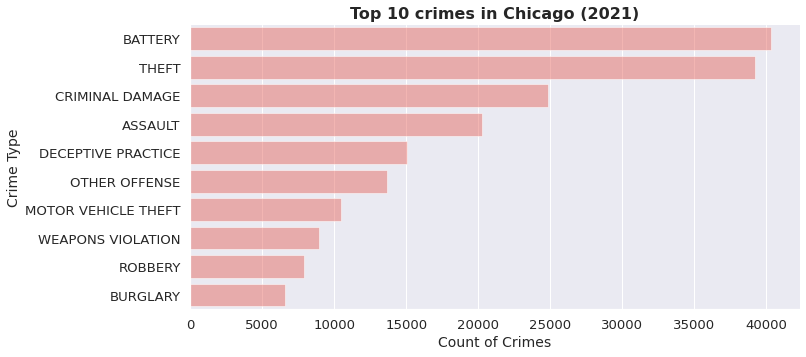

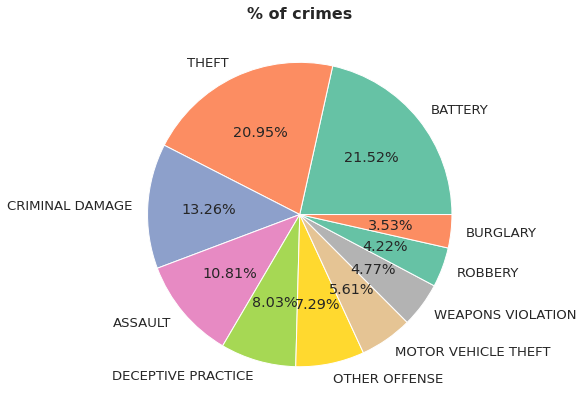

In [126]:
_ = sns.catplot(y='crime_type', 
            kind = 'count', 
            order=order, 
            data=chicago_df_21,
            height=5.2,
            aspect=2.2, 
            alpha=0.5,
            color='#FC5A50')
_ = plt.title('Top 10 crimes in Chicago (2021)', 
              fontdict={'fontsize':16,
                        'fontweight':'bold'})
_ = plt.xlabel('Count of Crimes',fontdict={'fontsize':14})
_ = plt.ylabel('Crime Type',fontdict={'fontsize':14})
_ = plt.tight_layout()
_ = plt.savefig("images/Top10Crimes.png")
_ = plt.show()

#------------
colors = sns.color_palette('Set2')

_ = plt.figure(figsize=(12,7))
_ = plt.title('% of crimes', 
              fontdict={'fontsize':16,
                        'fontweight':'bold'})
_ = plt.pie(chicago_df_21['crime_type'].value_counts().values[:10],
        labels=chicago_df_21['crime_type'].value_counts().index[:10],
        autopct='%1.2f%%', 
        colors=colors)
_ = plt.savefig("images/%ofcrimes.png")
_ = plt.show()


<p><b>From above plot, below are the conclusions:</b></p>
<ol>
    <li>Both Theft & Battery were the most occuring crimes in 2021 with a count of ~40K.</li>
    <li>High counts of crimes like Battery and Assault indicate the presence of physical violent.</li>
</ol>

In [127]:
# The Frequency of top crimes over the year

In [128]:
month = list(chicago_df_21['month_name'].unique())

In [129]:
theft = chicago_df_21[chicago_df_21['crime_type'] == 'THEFT']['month_name'].value_counts()
battery = chicago_df_21[chicago_df_21['crime_type'] == 'BATTERY']['month_name'].value_counts()
crm_dmg = chicago_df_21[chicago_df_21['crime_type'] == 'CRIMINAL DAMAGE']['month_name'].value_counts()
assault = chicago_df_21[chicago_df_21['crime_type'] == 'ASSAULT']['month_name'].value_counts()
dec_pract = chicago_df_21[chicago_df_21['crime_type'] == 'DECEPTIVE PRACTICE']['month_name'].value_counts()

oth_offense = chicago_df_21[chicago_df_21['crime_type'] == 'OTHER OFFENSE']['month_name'].value_counts()
mot_veh = chicago_df_21[chicago_df_21['crime_type'] == 'MOTOR VEHICLE THEFT']['month_name'].value_counts()
weapons_violation = chicago_df_21[chicago_df_21['crime_type'] == 'WEAPONS VIOLATION']['month_name'].value_counts()
robbery = chicago_df_21[chicago_df_21['crime_type'] == 'ROBBERY']['month_name'].value_counts()
burglary = chicago_df_21[chicago_df_21['crime_type'] == 'BURGLARY']['month_name'].value_counts()

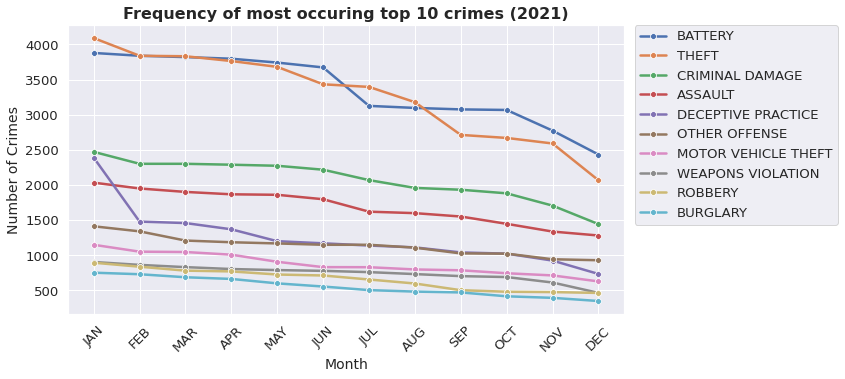

In [130]:
_ = plt.figure(figsize=(12,5.5))

_ = sns.lineplot(x=month, 
                y=battery.values,label='BATTERY',linewidth=2.5, data=battery, marker='8')

_ = sns.lineplot(x=month, 
                y=theft.values,label='THEFT', linewidth=2.5, data=theft,   marker='8')

_ = sns.lineplot(x=month, 
                y=crm_dmg.values,label='CRIMINAL DAMAGE',linewidth=2.5, data=crm_dmg, marker='8')

_ = sns.lineplot(x=month, 
                y=assault.values,label='ASSAULT',linewidth=2.5, data=assault, marker='8')

_ = sns.lineplot(x=month, 
                y=dec_pract.values,label='DECEPTIVE PRACTICE',linewidth=2.5, data=dec_pract, marker='8')

_ = sns.lineplot(x=month, 
                y=oth_offense.values,label='OTHER OFFENSE',linewidth=2.5, data=dec_pract, marker='8')

_ = sns.lineplot(x=month, 
                y=mot_veh.values,label='MOTOR VEHICLE THEFT',linewidth=2.5, data=dec_pract, marker='8')

_ = sns.lineplot(x=month, 
                y=weapons_violation.values,label='WEAPONS VIOLATION',linewidth=2.5, data=dec_pract, marker='8')

_ = sns.lineplot(x=month, 
                y=robbery.values,label='ROBBERY',linewidth=2.5, data=dec_pract, marker='8')

_ = sns.lineplot(x=month, 
                y=burglary.values,label='BURGLARY',linewidth=2.5, data=dec_pract, marker='8')

_ = plt.title('Frequency of most occuring top 10 crimes (2021)', 
            fontdict={'fontsize':16,
                    'fontweight':'bold'})

_ = plt.xlabel('Month',fontdict={'fontsize':14}, )
_ = plt.xticks(rotation=45)
_ = plt.ylabel('Number of Crimes',fontdict={'fontsize':14})
_ = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',borderaxespad=0)
_ = plt.tight_layout()
_ = plt.savefig("images/frequency_of_most.png")
_ = plt.show()

In [131]:
crime_data = pd.DataFrame(chicago_df_21.groupby(['crime_type'])['month_name'].value_counts()).unstack().dropna()
crime_data = crime_data.transpose()

In [132]:
crime_data.reset_index(drop = False, inplace=True)
crime_data

crime_type,level_0,month_name,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,...,NARCOTICS,OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,month_name,APR,41.0,1600.0,3068.0,417.0,15.0,1933.0,113.0,269.0,...,382.0,1.0,165.0,1186.0,46.0,465.0,70.0,33.0,2713.0,779.0
1,month_name,AUG,48.0,1868.0,3797.0,601.0,15.0,2302.0,140.0,281.0,...,189.0,3.0,136.0,1109.0,35.0,656.0,91.0,28.0,3764.0,790.0
2,month_name,DEC,45.0,1552.0,3126.0,688.0,3.0,1959.0,108.0,271.0,...,216.0,2.0,149.0,930.0,45.0,895.0,68.0,27.0,3433.0,613.0
3,month_name,FEB,23.0,1282.0,2434.0,350.0,15.0,1444.0,93.0,212.0,...,502.0,6.0,110.0,944.0,26.0,477.0,67.0,17.0,2068.0,466.0
4,month_name,JAN,39.0,1338.0,2774.0,484.0,11.0,1707.0,80.0,252.0,...,489.0,8.0,157.0,1027.0,45.0,727.0,73.0,27.0,2591.0,704.0
5,month_name,JUL,50.0,1951.0,3879.0,556.0,15.0,2472.0,144.0,305.0,...,223.0,6.0,154.0,1210.0,69.0,713.0,102.0,40.0,3832.0,832.0
6,month_name,JUN,49.0,1902.0,3839.0,505.0,18.0,2302.0,140.0,277.0,...,333.0,5.0,163.0,1413.0,65.0,599.0,94.0,30.0,3396.0,905.0
7,month_name,MAR,49.0,1448.0,3097.0,395.0,14.0,1882.0,125.0,278.0,...,579.0,8.0,142.0,1150.0,44.0,482.0,76.0,23.0,2670.0,761.0
8,month_name,MAY,49.0,1798.0,3673.0,472.0,12.0,2274.0,128.0,272.0,...,410.0,3.0,190.0,1341.0,47.0,504.0,96.0,37.0,3179.0,864.0
9,month_name,NOV,40.0,1621.0,3076.0,731.0,12.0,2070.0,111.0,301.0,...,260.0,1.0,142.0,1024.0,41.0,782.0,88.0,30.0,3681.0,691.0


In [133]:
crime_data.drop(columns='level_0', axis=1, inplace=True)

In [134]:
crime_data.set_index('month_name', inplace=True)
crime_data

crime_type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,HOMICIDE,...,NARCOTICS,OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
month_name,,,,,,,,,,,,,,,,,,,,,
APR,41.0,1600.0,3068.0,417.0,15.0,1933.0,113.0,269.0,1041.0,55.0,...,382.0,1.0,165.0,1186.0,46.0,465.0,70.0,33.0,2713.0,779.0
AUG,48.0,1868.0,3797.0,601.0,15.0,2302.0,140.0,281.0,1171.0,81.0,...,189.0,3.0,136.0,1109.0,35.0,656.0,91.0,28.0,3764.0,790.0
DEC,45.0,1552.0,3126.0,688.0,3.0,1959.0,108.0,271.0,735.0,53.0,...,216.0,2.0,149.0,930.0,45.0,895.0,68.0,27.0,3433.0,613.0
FEB,23.0,1282.0,2434.0,350.0,15.0,1444.0,93.0,212.0,1480.0,38.0,...,502.0,6.0,110.0,944.0,26.0,477.0,67.0,17.0,2068.0,466.0
JAN,39.0,1338.0,2774.0,484.0,11.0,1707.0,80.0,252.0,2390.0,55.0,...,489.0,8.0,157.0,1027.0,45.0,727.0,73.0,27.0,2591.0,704.0
JUL,50.0,1951.0,3879.0,556.0,15.0,2472.0,144.0,305.0,1201.0,112.0,...,223.0,6.0,154.0,1210.0,69.0,713.0,102.0,40.0,3832.0,832.0
JUN,49.0,1902.0,3839.0,505.0,18.0,2302.0,140.0,277.0,1370.0,84.0,...,333.0,5.0,163.0,1413.0,65.0,599.0,94.0,30.0,3396.0,905.0
MAR,49.0,1448.0,3097.0,395.0,14.0,1882.0,125.0,278.0,1459.0,44.0,...,579.0,8.0,142.0,1150.0,44.0,482.0,76.0,23.0,2670.0,761.0
MAY,49.0,1798.0,3673.0,472.0,12.0,2274.0,128.0,272.0,1139.0,66.0,...,410.0,3.0,190.0,1341.0,47.0,504.0,96.0,37.0,3179.0,864.0


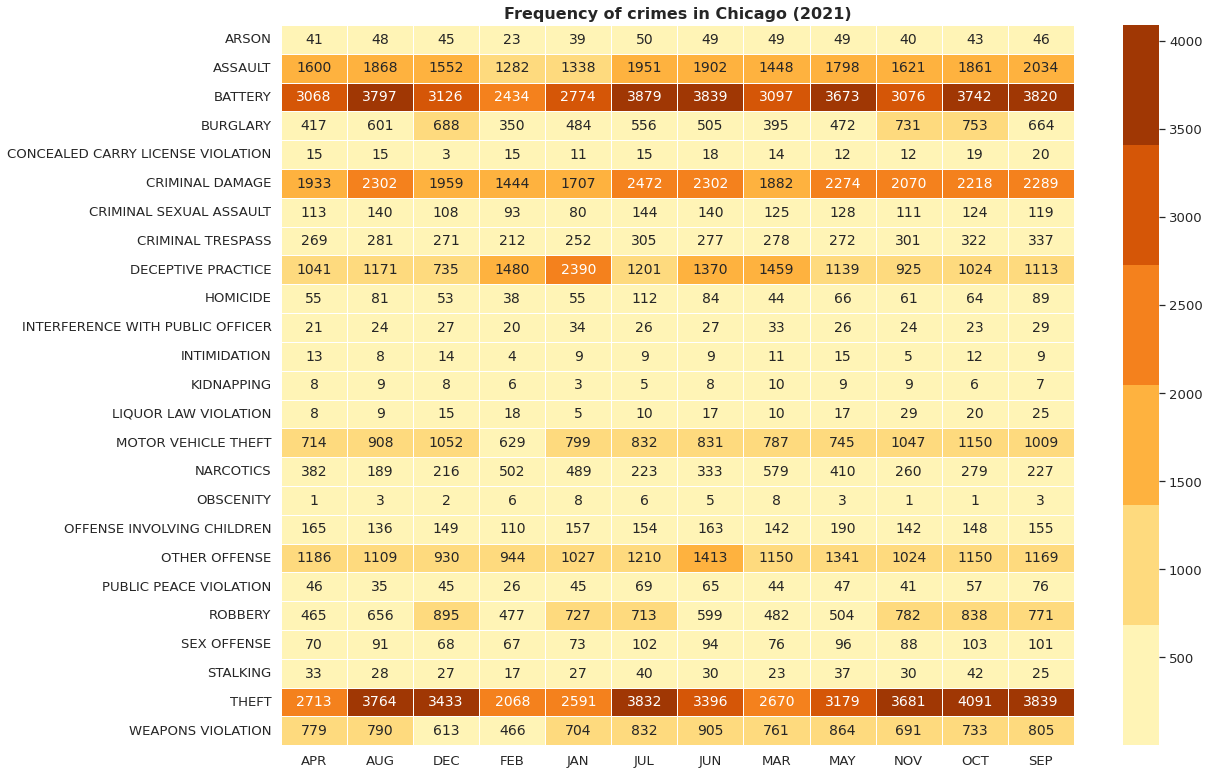

In [135]:
_ = plt.figure(figsize=(18,11))
sns.set(font_scale=1.2)
colormap = sns.color_palette('YlOrBr')
ax = sns.heatmap(
            data=crime_data.T, 
            annot=True,
            fmt='.0f',
            annot_kws={"size": 14},
            linewidths=.5, cbar=True, cmap=colormap,

    )
_ = plt.title('Frequency of crimes in Chicago (2021)', 
            fontdict={'fontsize':16,
                    'fontweight':'bold'})

_ = plt.xlabel('')
_ = plt.ylabel('')

_ = plt.tight_layout()
_ = plt.savefig("images/crime_2021.png")
plt.show()

In [136]:
# month = list(chicago_df_21['month_name'].unique())
# df = pd.DataFrame(chicago_df_21.groupby(['crime_type'])['month_name'].value_counts()).unstack().dropna()

# cols = list(df.select_dtypes(include=['float64']).columns)
# df[cols] = df[cols].astype('int32')
# df['month_name']

In [137]:
# Monthly frequency of the crimes in 2021

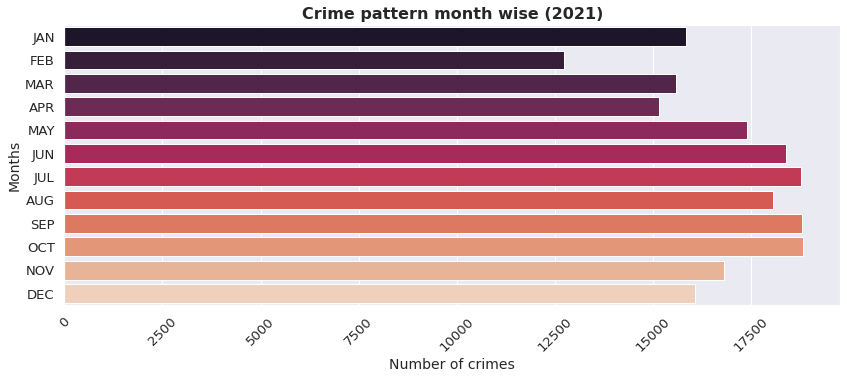

In [138]:
_ = plt.figure(figsize=(12,5.5))

_ = sns.barplot(x=chicago_df_21['month_name'].value_counts().values, 
            y=chicago_df_21['month_name'].value_counts().index,
            order=month,
            data=chicago_df_21, 
            orient='h',
            palette='rocket')
_ = plt.title('Crime pattern month wise (2021)', 
            fontdict={'fontsize':16,
                    'fontweight':'bold'})

_ = plt.xlabel('Number of crimes',fontdict={'fontsize':14}, )
_ = plt.xticks(rotation=45)
_ = plt.ylabel('Months',fontdict={'fontsize':14})
_ = plt.tight_layout()
_ = plt.savefig("images/crime_pattern_2021.png")
_ = plt.show()

In [139]:
# Crime pattern during weekdays

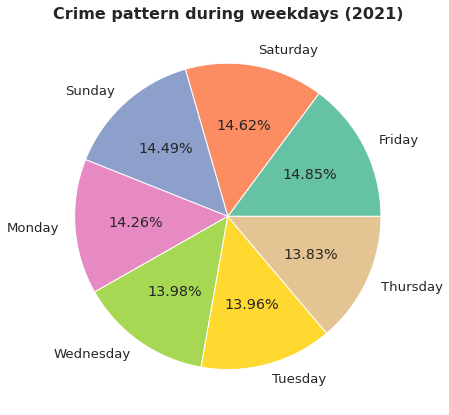

In [140]:
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
colors = sns.color_palette('Set2')

_ = plt.figure(figsize=(12,6))

# -----------------------------------------------------------------------
# _ = sns.barplot(y = chicago_df_21['weekday'].value_counts().index, 
#             x = chicago_df_21['weekday'].value_counts().values,
#             data =chicago_df_21,
#             orient ='h',
#             order= weekdays,
#             alpha = 0.6,)
# plt.show()

# _ = plt.figure(figsize=(12,6))
# ------------------------------------------------------------------------

_ = plt.pie(chicago_df_21['weekday'].value_counts().values,
        labels=chicago_df_21['weekday'].value_counts().index,
        autopct='%1.2f%%', 
        colors=colors)

_ = plt.title('Crime pattern during weekdays (2021)', 
            fontdict={'fontsize':16,
                    'fontweight':'bold'})
_ = plt.tight_layout()
_ = plt.savefig("images/weekday.png")
_ = plt.show()

In [141]:
# Crime pattern on hourly basis

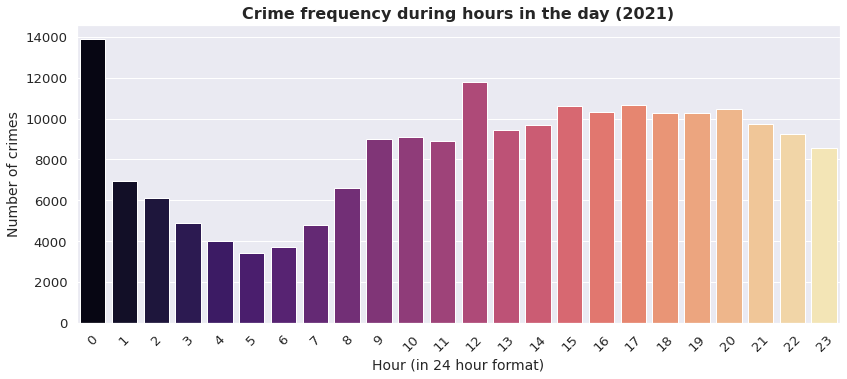

In [142]:
hours = list(range(0,24))
_ = plt.figure(figsize=(12,5.5))

_ = sns.barplot(y = chicago_df_21['hour'].value_counts().values, 
                x = chicago_df_21['hour'].value_counts().index,
                data =chicago_df_21,
                orient ='v',
                order= hours,
               palette='magma')

_ = plt.title('Crime frequency during hours in the day (2021)', 
            fontdict={'fontsize':16,
                    'fontweight':'bold'})

_ = plt.xlabel('Hour (in 24 hour format)',fontdict={'fontsize':14}, )
_ = plt.xticks(rotation=45)
_ = plt.ylabel('Number of crimes',fontdict={'fontsize':14})
_ = plt.tight_layout()
_ = plt.savefig("images/crime_hours.png")
_ = plt.show()


In [143]:
# Crime V/s Arrest in Chicago (2021)

In [144]:
x1 = month
y1 = chicago_df_21['month_name'].value_counts().values

#-----------------------------------------------------------------

x2 = month
y2 = chicago_df_21[chicago_df_21['Arrest'] == True]['month_name'].value_counts().values

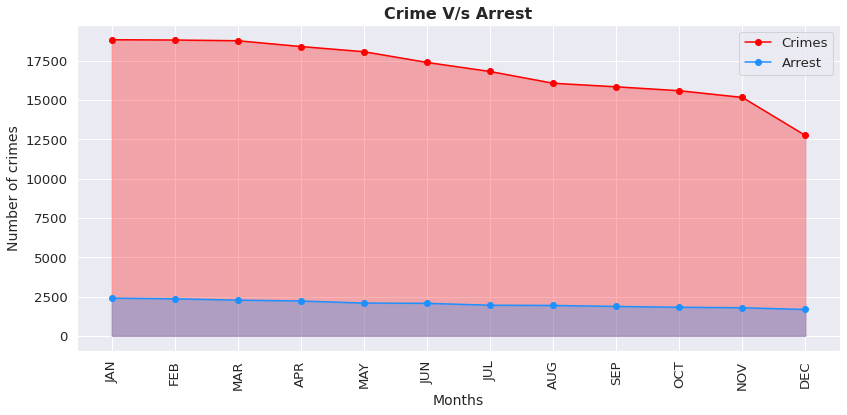

In [145]:
_ = plt.figure(figsize=(12,6))

_ = plt.plot(x1, y1, '-o', color='red', label='Crimes',)
_ = plt.fill_between(x1, y1,alpha=0.3, color='red')

_ = plt.plot(x2, y2, '-o', color='dodgerblue', label='Arrest')
_ = plt.fill_between(x2, y2, alpha=0.3, color='dodgerblue')

_ = plt.title('Crime V/s Arrest', 
            fontdict={'fontsize':16,
                    'fontweight':'bold'})

_ = plt.xlabel('Months',fontdict={'fontsize':14})
_ = plt.ylabel('Number of crimes',fontdict={'fontsize':14})
_ = plt.xticks(rotation = 90)
_ = plt.legend()
_ = plt.tight_layout()
_ = plt.savefig("images/crime_arrest_pattern.png")
_ = plt.show()

In [146]:
# Arrest V/s Crime Type

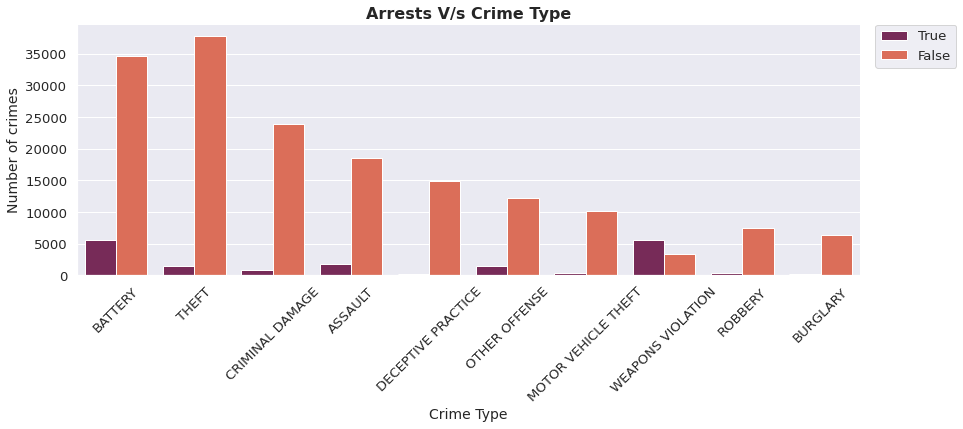

In [147]:
hue_order = [True, False]

_ = sns.catplot(x='crime_type', 
                data=chicago_df_21, 
                kind='count', 
                order=order, 
                hue='Arrest', 
                hue_order=hue_order, 
                legend=False,
                height=6.2, 
                aspect=2.2,
               palette='rocket',  )

_ = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',borderaxespad=0)

_ = plt.xticks(rotation=45)

_ = plt.title('Arrests V/s Crime Type', 
            fontdict={'fontsize':16,
                    'fontweight':'bold'})

_ = plt.xlabel('Crime Type',fontdict={'fontsize':14})

_ = plt.ylabel('Number of crimes',fontdict={'fontsize':14})

_ = plt.tight_layout()
_ = plt.savefig("images/crime_type_arrest.png")
_ = plt.show()

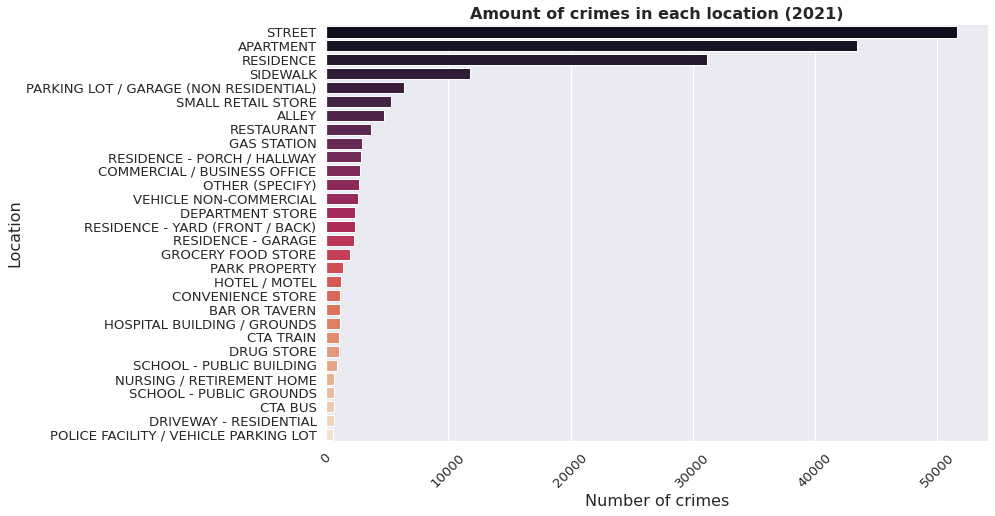

In [148]:
_ = sns.catplot(y='location_desc', 
                data=chicago_df_21, 
                kind='count', 
                order=chicago_df_21['location_desc'].value_counts().index[:30], 
                legend=False,
                height=7.4, 
                aspect=1.9,
               palette='rocket')

_ = plt.title('Amount of crimes in each location (2021)', 
            fontdict={'fontsize':16,
                    'fontweight':'bold'})

_ = plt.xlabel('Number of crimes',fontdict={'fontsize':16}, )
_ = plt.xticks(rotation=45)
_ = plt.ylabel('Location',fontdict={'fontsize':16})
_ = plt.tight_layout()
_ = plt.savefig('images/crime_loc_2021.jpeg')
_ = plt.show()

In [149]:
# Crime Patterns in Locations Wise

In [150]:
dt = chicago_df_21.pivot_table(index = ['location_desc'], columns='crime_type', 
                               values='month_name', aggfunc='count', margins=False,
                                fill_value = 0)

dt = dt.reset_index()

dt_crime = dt.melt(id_vars=['location_desc'], value_vars=['BATTERY', 'THEFT', 'CRIMINAL DAMAGE', 'ASSAULT',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT',
       'WEAPONS VIOLATION', 'ROBBERY', 'BURGLARY'])

# o = dt_crime['location_desc'].value_counts().index[:20]

In [151]:
# Rate of each crime in Top 10 location (2021)

In [152]:
top_loc_10 = list(chicago_df_21['location_desc'].value_counts().index[:10])
dt_top_loc_10 = dt.melt(id_vars='location_desc')
dt_top_loc_10 = dt_top_loc_10.query("location_desc in ({})".format(top_loc_10))

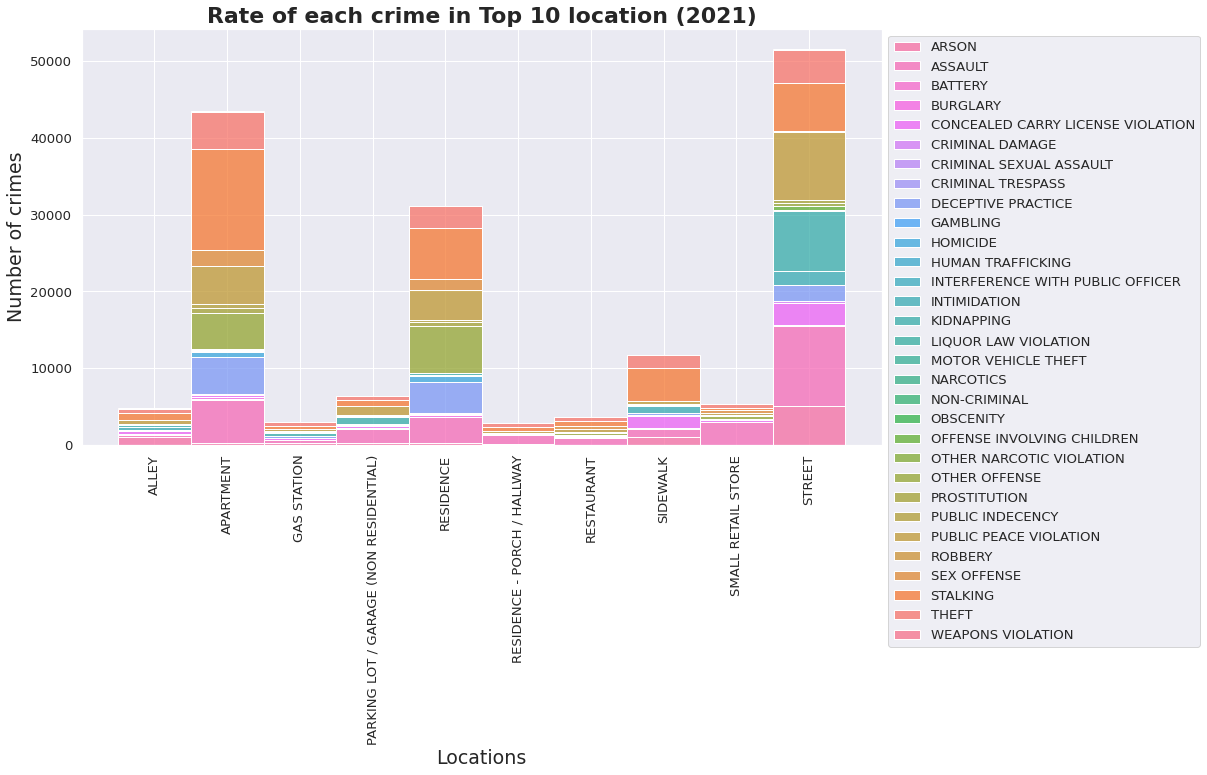

In [153]:
_ = plt.figure(figsize=(17,11))
g = sns.histplot(x='location_desc', weights='value', data=dt_top_loc_10, hue='crime_type', multiple='stack')
# _ = plt.legend(o, bbox_to_anchor=(1.02, 1), loc='upper left',borderaxespad=0,)
_ = g.legend(dt_top_loc_10['crime_type'].unique(),loc='best', bbox_to_anchor=(1.00, 1))
_ = plt.title('Rate of each crime in Top 10 location (2021)', 
            fontdict={'fontsize':22,
                    'fontweight':'bold'})

_ = plt.xlabel('Locations',fontdict={'fontsize':19}, )
_ = plt.xticks(rotation=90)
_ = plt.ylabel('Number of crimes',fontdict={'fontsize':19})
_ = plt.tight_layout()
_ = plt.savefig('images/rate_each_crime_2021.jpeg')
_ = plt.show()

In [154]:
# Rate of top 10 crimes in each location

<p><b>Plotting total rate of each crime in each location will contains too much of information. Therefore, we can split the   information into three parts for top 10 crimes in each locations</b></p>

In [155]:
# # _ = plt.figure(figsize=(20,18))
# sns.set(rc={"figure.figsize":(24.9, 9)}) 
# g = sns.histplot(x='location_desc', weights='value', data=dt_l, hue='crime_type',
#                  multiple='stack', shrink=0.4)
# # _ = plt.legend(o, bbox_to_anchor=(1.02, 1), loc='upper left',borderaxespad=0,)
# _ = g.legend(dt_l['crime_type'].unique(),loc='best', bbox_to_anchor=(1.20, 1))
# # _ = plt.title('Rate of each crime per location (2021)', 
# #             fontdict={'fontsize':22,
# #                     'fontweight':'bold'})
# # g.figure.
# # _ = plt.xlabel('Crime Type',fontdict={'fontsize':19}, )
# _ = plt.xticks(rotation=90)
# # _ = plt.ylabel('Number of crimes',fontdict={'fontsize':19})
# # _ = plt.tight_layout()
# _ = plt.show()

In [156]:
col_loc_1 = list(dt_crime['location_desc'].value_counts().index[0:42])
X_loc_1 = dt_crime.query("location_desc in ({})".format(col_loc_1))

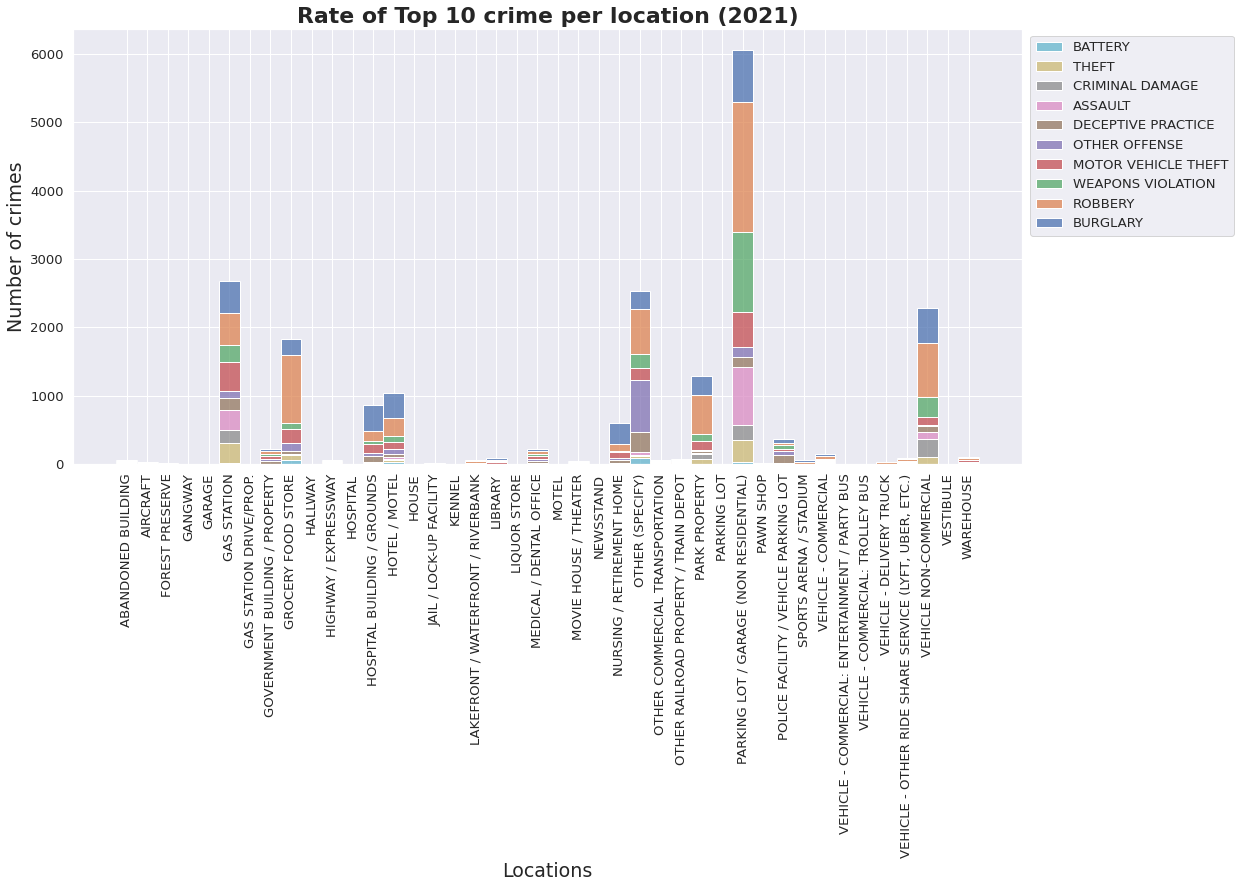

In [157]:
_ = plt.figure(figsize=(17,8))
g = sns.histplot(x='location_desc', weights='value', data=X_loc_1, hue='crime_type', multiple='stack')
# _ = plt.legend(o, bbox_to_anchor=(1.02, 1), loc='upper left',borderaxespad=0,)
_ = g.legend(X_loc_1['crime_type'].unique(),loc='best', bbox_to_anchor=(1.23, 1))
_ = plt.title('Rate of Top 10 crime per location (2021)', 
            fontdict={'fontsize':22,
                    'fontweight':'bold'})

_ = plt.xlabel('Locations',fontdict={'fontsize':19}, )
_ = plt.xticks(rotation=90)
_ = plt.ylabel('Number of crimes',fontdict={'fontsize':19})
# _ = plt.tight_layout()
_ = plt.savefig("images/top1.png")
_ = plt.show()

In [158]:
col_loc_2 = list(dt_crime['location_desc'].value_counts().index[42:84])
X_loc_2 = dt_crime.query("location_desc in ({})".format(col_loc_2))

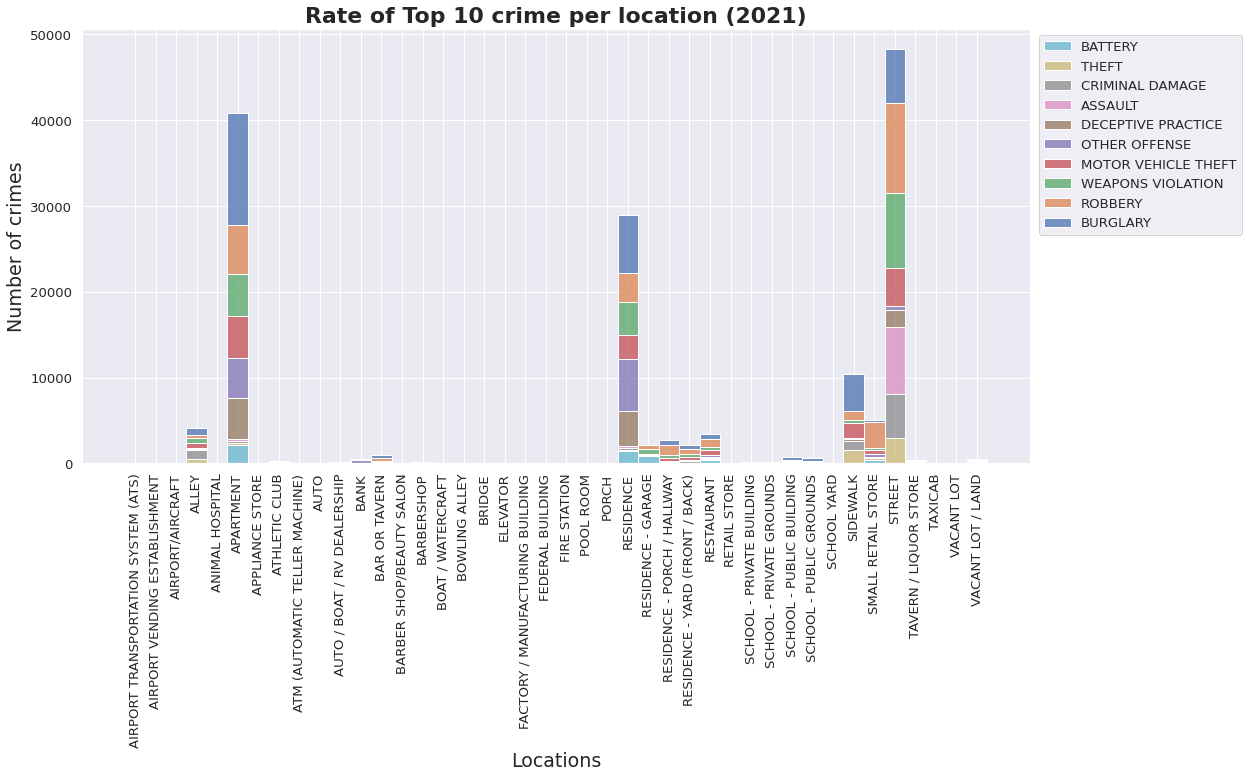

In [159]:
_ = plt.figure(figsize=(17,8))
g = sns.histplot(x='location_desc', weights='value', data=X_loc_2, hue='crime_type', multiple='stack')
# _ = plt.legend(o, bbox_to_anchor=(1.02, 1), loc='upper left',borderaxespad=0,)
_ = g.legend(X_loc_2['crime_type'].unique(),loc='best', bbox_to_anchor=(1.23, 1))
_ = plt.title('Rate of Top 10 crime per location (2021)', 
            fontdict={'fontsize':22,
                    'fontweight':'bold'})

_ = plt.xlabel('Locations',fontdict={'fontsize':19}, )
_ = plt.xticks(rotation=90)
_ = plt.ylabel('Number of crimes',fontdict={'fontsize':19})
# _ = plt.tight_layout()
_ = plt.savefig("images/top2.png")
_ = plt.show()

In [160]:
col_loc_3 = list(dt_crime['location_desc'].value_counts().index[84:])
X_loc_3 = dt_crime.query("location_desc in ({})".format(col_loc_3))

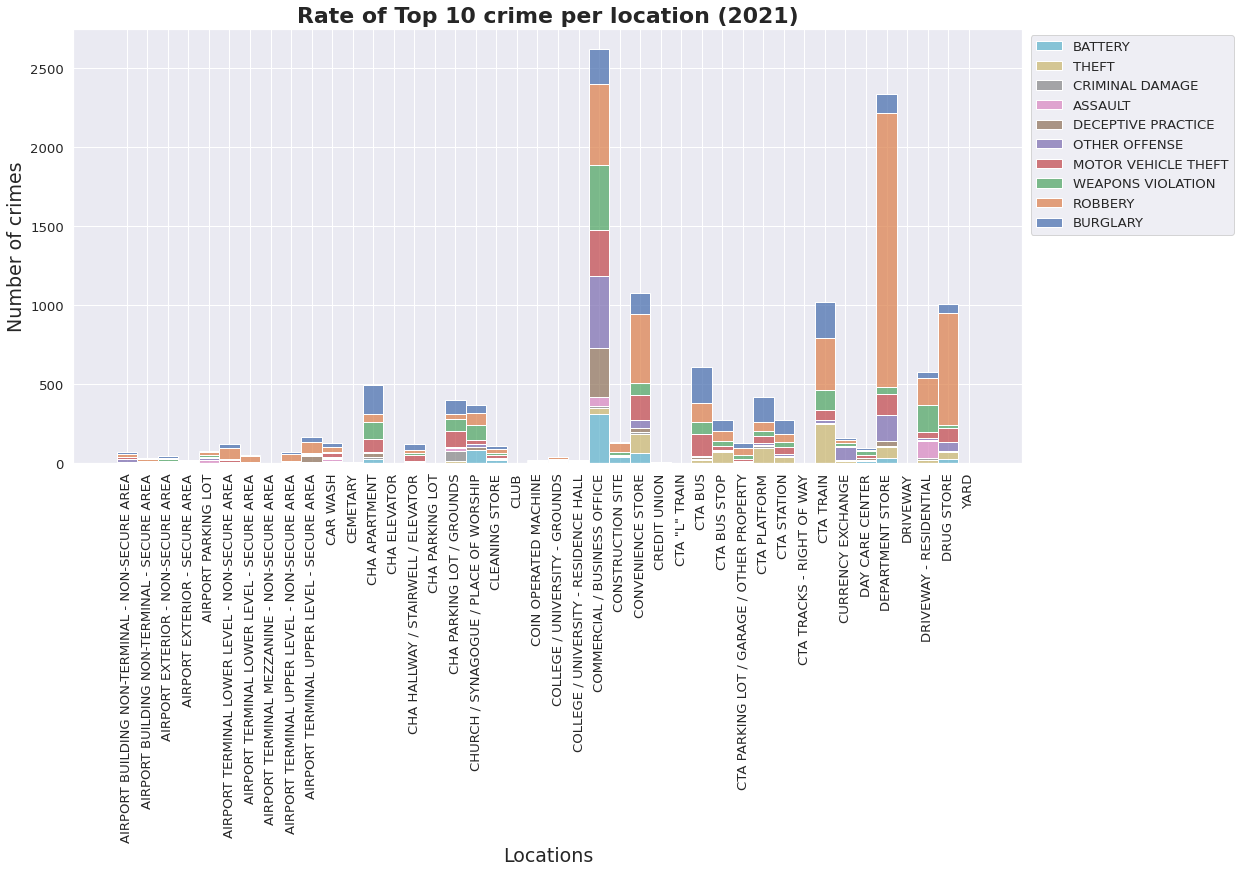

In [161]:
_ = plt.figure(figsize=(17,8))
g = sns.histplot(x='location_desc', weights='value', data=X_loc_3, hue='crime_type', multiple='stack')
# _ = plt.legend(o, bbox_to_anchor=(1.02, 1), loc='upper left',borderaxespad=0,)
_ = g.legend(X_loc_3['crime_type'].unique(),loc='best', bbox_to_anchor=(1.23, 1))
_ = plt.title('Rate of Top 10 crime per location (2021)', 
            fontdict={'fontsize':22,
                    'fontweight':'bold'})

_ = plt.xlabel('Locations',fontdict={'fontsize':19}, )
_ = plt.xticks(rotation=90)
_ = plt.ylabel('Number of crimes',fontdict={'fontsize':19})
# _ = plt.tight_layout()
_ = plt.savefig("images/top3.png")
_ = plt.show()

In [162]:
# Crime Concentration in Chicago 2021

In [163]:
# Subsetting Top 10 Crimes in Chicago
ordered_crime_lst = list(order)
subset_top_crime = chicago_df_21.query("crime_type in ({})".format(ordered_crime_lst))

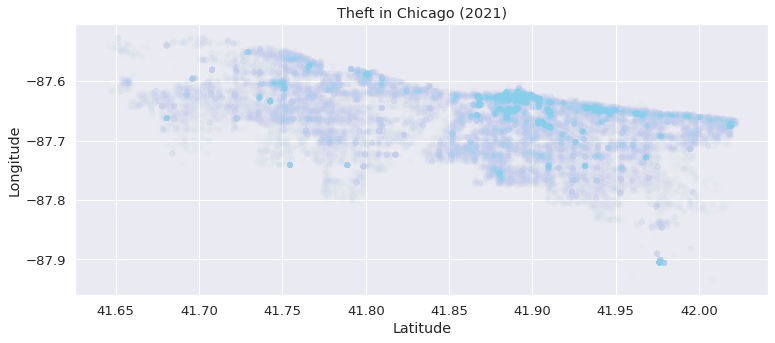

In [164]:
#THEFT
_ = plt.figure(figsize=(11,5))
g = sns.scatterplot(data=subset_top_crime[subset_top_crime['crime_type'] == 'THEFT'],
                x='Latitude',
                y='Longitude',
                edgecolor='none',
                color='skyblue',
                alpha=.01,
)
_ = g.set_title('Theft in Chicago (2021)')
_ = g.figure.tight_layout()
_ = plt.savefig("images/theft.png")
_ = plt.show()

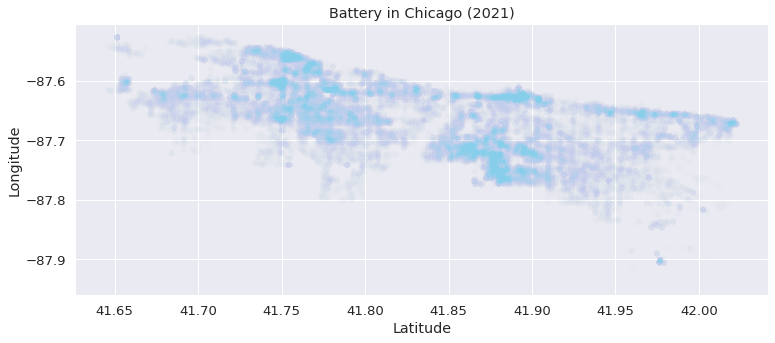

In [165]:
#BATTERY
_ = plt.figure(figsize=(11,5))
g = sns.scatterplot(data=subset_top_crime[subset_top_crime['crime_type'] == 'BATTERY'],
                x='Latitude',
                y='Longitude',
                edgecolor='none',
                color='skyblue',
                alpha=.01,
)
_ = g.set_title('Battery in Chicago (2021)')
_ = g.figure.tight_layout()
_ = plt.savefig("images/Battery.png")
_ = plt.show()

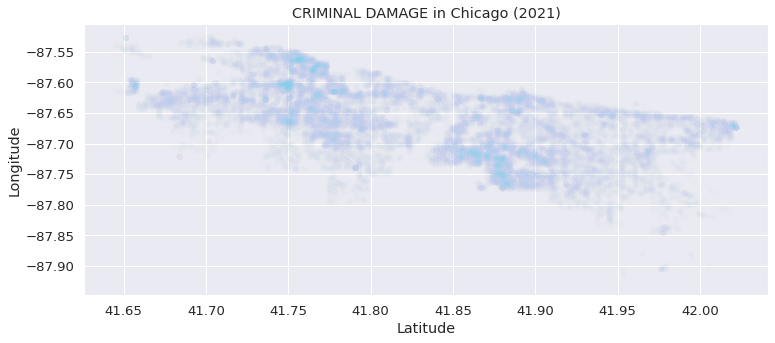

In [166]:
#CRIMINAL DAMAGE
_ = plt.figure(figsize=(11,5))
g = sns.scatterplot(data=subset_top_crime[subset_top_crime['crime_type'] == 'CRIMINAL DAMAGE'],
                x='Latitude',
                y='Longitude',
                edgecolor='none',
                color='skyblue',
                alpha=.01,
)
_ = g.set_title('CRIMINAL DAMAGE in Chicago (2021)')
_ = g.figure.tight_layout()
_ = plt.savefig("images/CRIMINALDAMAGE.png")
_ = plt.show()

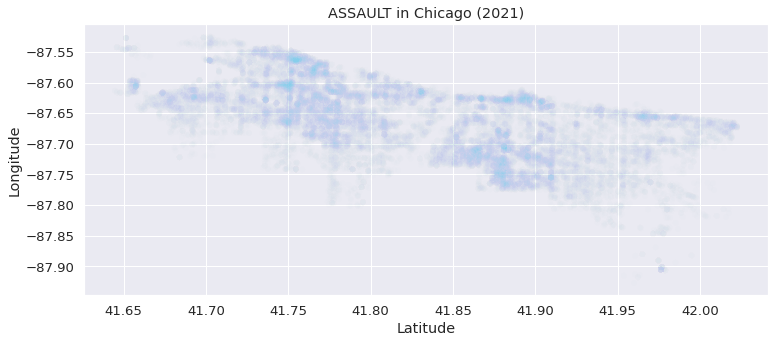

In [167]:
#ASSAULT
_ = plt.figure(figsize=(11,5))
g = sns.scatterplot(data=subset_top_crime[subset_top_crime['crime_type'] == 'ASSAULT'],
                x='Latitude',
                y='Longitude',
                edgecolor='none',
                color='skyblue',
                alpha=.01,
)
_ = g.set_title('ASSAULT in Chicago (2021)')
_ = g.figure.tight_layout()
_ = plt.savefig("images/ASSAULT.png")
_ = plt.show()

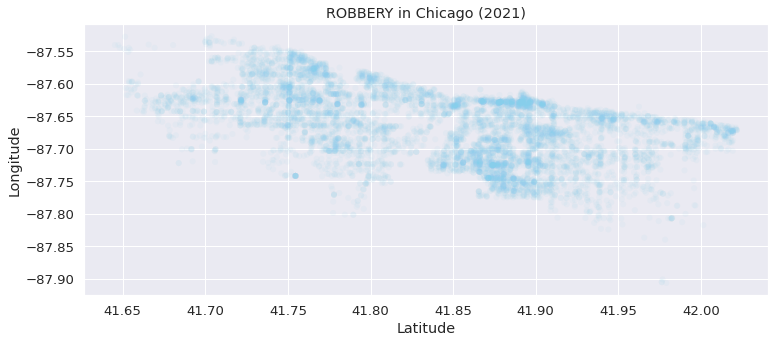

In [168]:
#ROBBERY
_ = plt.figure(figsize=(11,5))
g = sns.scatterplot(data=subset_top_crime[subset_top_crime['crime_type'] == 'ROBBERY'],
                x='Latitude',
                y='Longitude',
                edgecolor='none',
                color='skyblue',
                alpha=.07,
)
_ = g.set_title('ROBBERY in Chicago (2021)')
_ = g.figure.tight_layout()
_ = plt.savefig("images/ROBBERY.png")
_ = plt.show()

In [169]:
# o1 = dt_crime['location_desc'].value_counts().index[21:41]

In [170]:
# _ = plt.figure(figsize=(15,10))
# g = sns.histplot(x='crime_type', weights='value', data=dt_crime, hue='location_desc', 
#                 hue_order=o1,
#                  multiple='stack')
# # _ = plt.legend(o, bbox_to_anchor=(1.02, 1), loc='upper left',borderaxespad=0,)
# _ = g.legend(o1,loc='best', bbox_to_anchor=(1.53, 1))
# _ = plt.title('Rate of each crime per location (2021)', 
#             fontdict={'fontsize':22,
#                     'fontweight':'bold'})

# _ = plt.xlabel('Crime Type',fontdict={'fontsize':19}, )
# _ = plt.xticks(rotation=90)
# _ = plt.ylabel('Number of crimes',fontdict={'fontsize':19})
# _ = plt.show()

In [171]:
# col_val = dt_crime['location_desc'].value_counts().index[21:41]
# col_val = list(col_val)
# o2 = dt_crime.query("location_desc in ({})".format(col_val))
# _ = plt.figure(figsize=(15,10))
# g = sns.histplot(x='location_desc', weights='value', data=o2, hue='crime_type', 
# #                 hue_order=o2,
#                  multiple='stack')
# # _ = plt.legend(o, bbox_to_anchor=(1.02, 1), loc='upper left',borderaxespad=0,)
# # g.legend(o2,loc='best', bbox_to_anchor=(1.35, 1))
# _ = plt.title('Rate of Top 10 crime per location (2021)', 
#             fontdict={'fontsize':22,
#                     'fontweight':'bold'})

# _ = plt.xlabel('Crime Type',fontdict={'fontsize':19}, )
# _ = plt.xticks(rotation=90)
# _ = plt.ylabel('Number of crimes',fontdict={'fontsize':19})
# # _ = plt.tight_layout()
# _ = plt.show()